In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def squareErosion(img, s=3):
    if s % 2 == 0:
        raise ValueError(f'Structuring event size must be odd number! (s={s})')
        
    h, w = img.shape[:2]
    ds = np.int32(s // 2)
    imgres = np.zeros((h-2*ds, w-2*ds),
                      dtype=img.dtype)  # Image result

    for y in range(ds, h-ds):
        for x in range(ds, w-ds):
            patch = img[y-ds:y+ds+1, x-ds:x+ds+1]
            imgres[y-ds,x-ds] = np.min(patch)

    return imgres

def squareDilation(img, s=3):
    if s % 2 == 0:
        raise ValueError(f'Structuring event size must be odd number! (s={s})')
    
    h, w = img.shape[:2]
    ds = np.int32(s // 2)
    imgpad = np.pad(img, ds, mode='edge')  # Padded for safe patch extraction
    imgres = np.zeros((h+2*ds, w+2*ds),
                      dtype=img.dtype) # Image result

    for y in range(h + 2*ds):
        for x in range(w + 2*ds):
            patch = imgpad[y:y+s, x:x+s]
            imgres[y,x] = np.max(patch)

    return imgres

def Opening(img, s=3):
    return squareDilation(squareErosion(img, s=s), s=s)

def Closing(img, s=3):
    return squareErosion(squareDilation(img, s=s), s=s)

def Boundary(img, s=3):
    ds = np.int32(s // 2)
    erosion = squareErosion(img, s=s)
    return img - np.pad(erosion, ds, mode='edge')

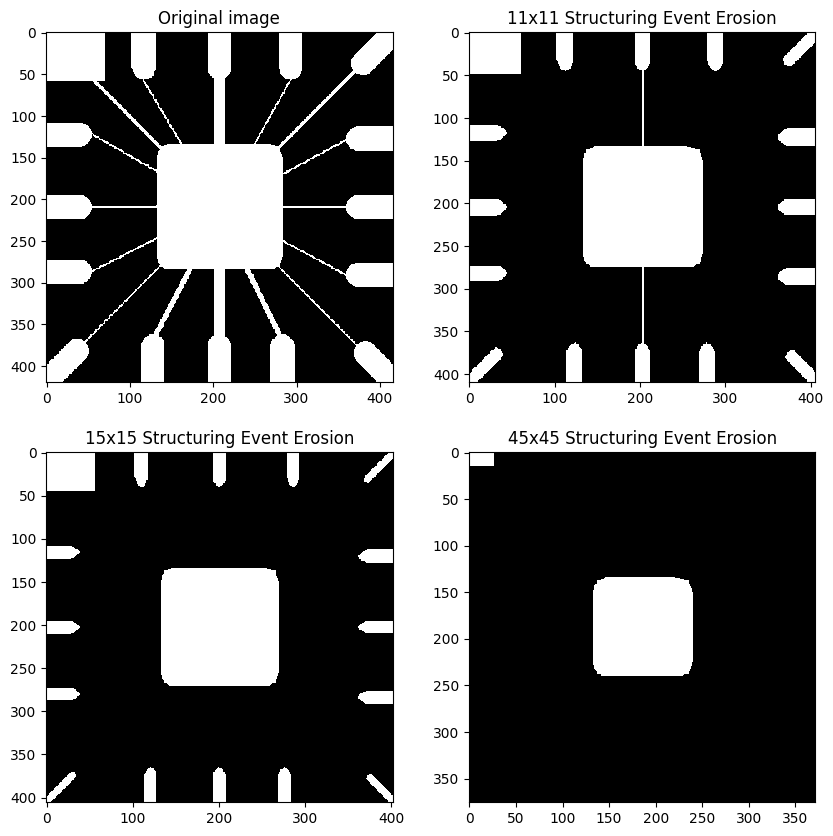

In [66]:
# Erosion
FILENAME = 'morpho1.png'
IMG = plt.imread(FILENAME)
IMG_E11 = squareErosion(IMG, s=11)
IMG_E15 = squareErosion(IMG, s=15)
IMG_E45 = squareErosion(IMG, s=45)

def showImg(a, img, title):
    a.imshow(img, cmap='gray', interpolation='none')
    a.set_title(title)

fig, ax = plt.subplots(2, 2, figsize=(10,10))
showImg(ax[0,0], IMG, 'Original image')
showImg(ax[0,1], IMG_E11, '11x11 Structuring Event Erosion')
showImg(ax[1,0], IMG_E15, '15x15 Structuring Event Erosion')
showImg(ax[1,1], IMG_E45, '45x45 Structuring Event Erosion')
plt.show()

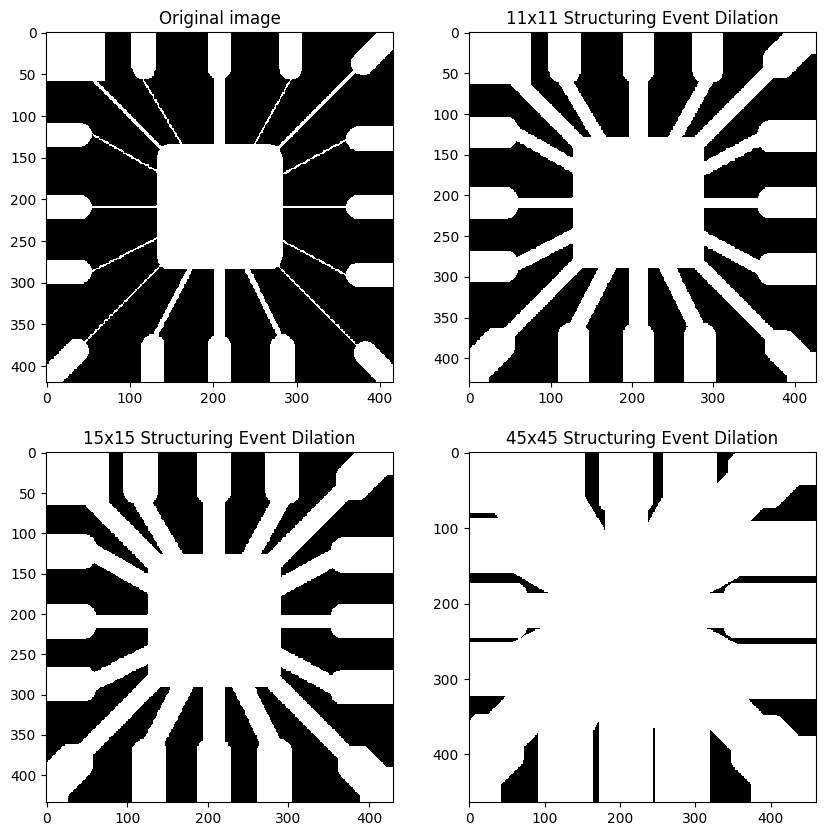

In [71]:
# Dilation
FILENAME = 'morpho1.png'
IMG = plt.imread(FILENAME)
IMG_D11 = squareDilation(IMG, s=11)
IMG_D15 = squareDilation(IMG, s=15)
IMG_D45 = squareDilation(IMG, s=45)

def showImg(a, img, title):
    a.imshow(img, cmap='gray', interpolation='none')
    a.set_title(title)

fig, ax = plt.subplots(2, 2, figsize=(10,10))
showImg(ax[0,0], IMG, 'Original image')
showImg(ax[0,1], IMG_D11, '11x11 Structuring Event Dilation')
showImg(ax[1,0], IMG_D15, '15x15 Structuring Event Dilation')
showImg(ax[1,1], IMG_D45, '45x45 Structuring Event Dilation')
plt.show()

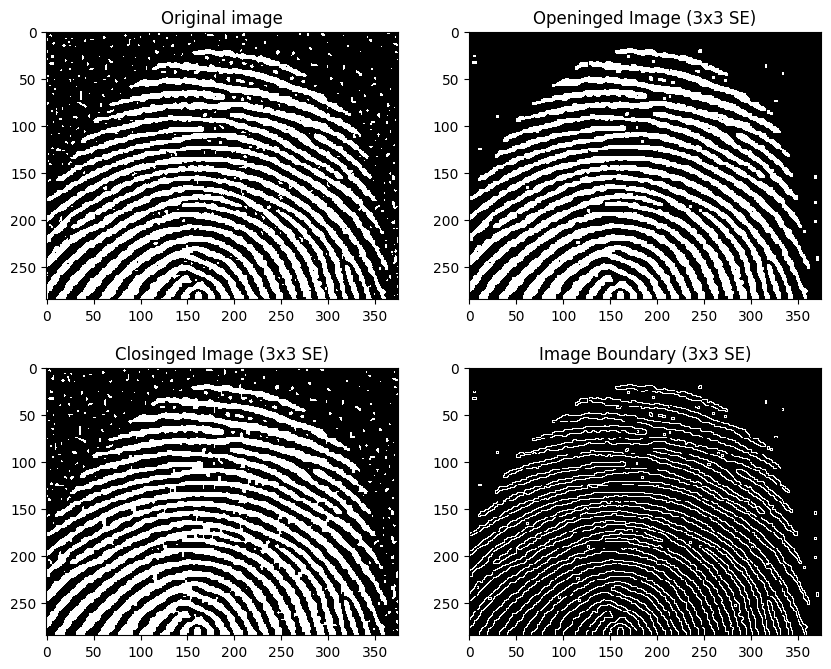

In [86]:
# Opening and Closing
FILENAME = 'morpho2.png'
IMG = plt.imread(FILENAME)
IMG_O3 = Opening(IMG, s=3)
IMG_C3 = Closing(IMG, s=3)
IMG_B3 = Boundary(IMG_O3, s=3)

def showImg(a, img, title):
    a.imshow(img, cmap='gray', interpolation='none')
    a.set_title(title)

fig, ax = plt.subplots(2, 2, figsize=(10,8))
showImg(ax[0,0], IMG, 'Original image')
showImg(ax[0,1], IMG_O3, 'Openinged Image (3x3 SE)')
showImg(ax[1,0], IMG_C3, 'Closinged Image (3x3 SE)')
showImg(ax[1,1], IMG_B3, 'Image Boundary (3x3 SE)')
plt.show()